In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\kotha\OneDrive\Desktop\ML_project_first\Battery_dataset.csv")

In [3]:
df.head()

,battery_id,cycle,chI,chV,chT,disI,disV,disT,BCt,SOH,RUL
0,B5,1,1.440147,4.254682,23.988733,1.894407,3.273523,32.980834,1.986196,99.309790,219
1,B5,2,1.416595,4.159825,25.665347,1.829949,4.038741,32.257920,1.986240,99.311985,218
2,B5,3,1.420272,4.276323,25.407910,1.942105,3.214433,35.134801,1.984252,99.212608,217
3,B5,4,1.337680,4.236697,27.069757,2.073577,3.134529,32.082988,1.969236,98.461812,216
4,B5,5,1.263946,4.142791,26.478353,2.049885,3.729341,32.483154,1.974862,98.743106,215


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   battery_id  680 non-null    object 
 1   cycle       680 non-null    int64  
 2   chI         680 non-null    float64
 3   chV         680 non-null    float64
 4   chT         680 non-null    float64
 5   disI        680 non-null    float64
 6   disV        680 non-null    float64
 7   disT        680 non-null    float64
 8   BCt         680 non-null    float64
 9   SOH         680 non-null    float64
 10  RUL         680 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 58.6+ KB


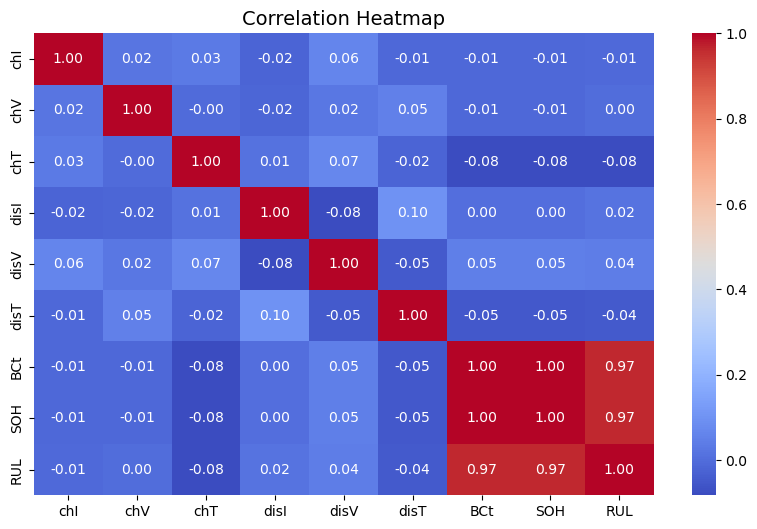

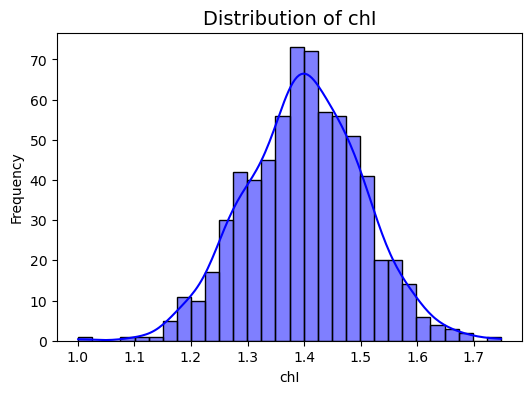

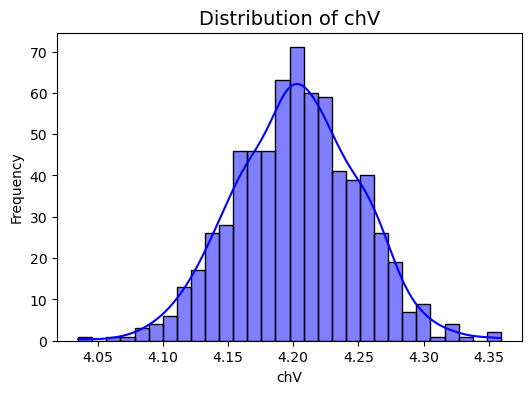

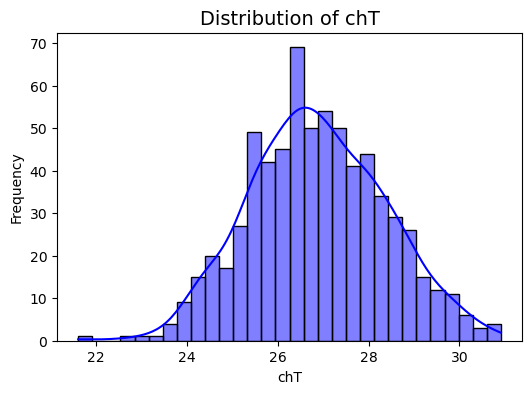

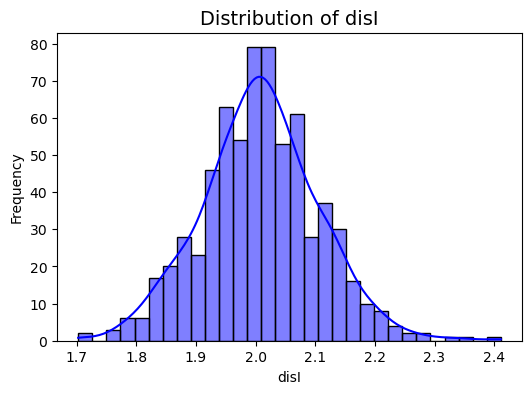

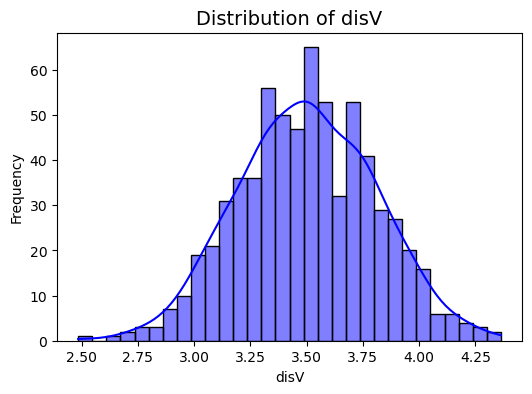

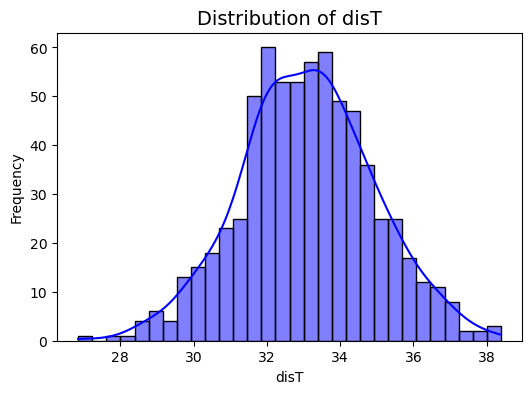

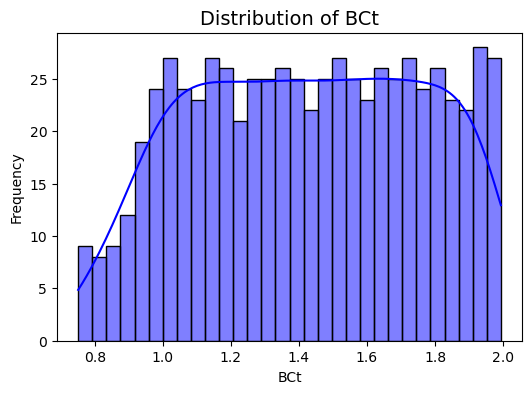

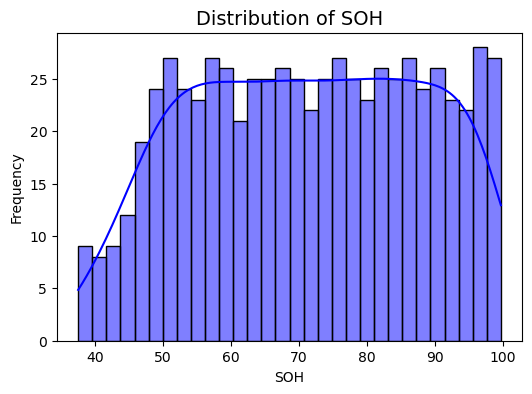

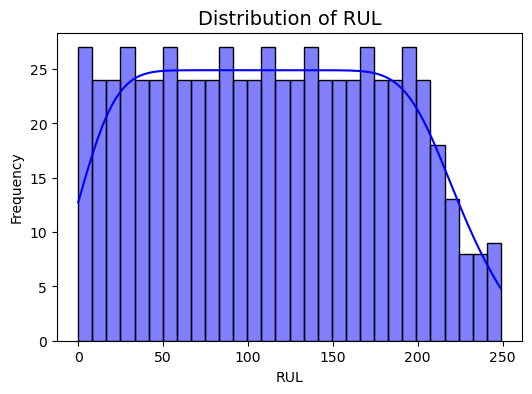

In [5]:
numeric_cols = ['chI', 'chV', 'chT', 'disI', 'disV', 'disT', 'BCt', 'SOH', 'RUL']

plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


for feature in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cycle,680.0,114.470588,66.601594,1.000000,57.000000,114.000000,170.250000,250.000000
chI,680.0,1.400069,0.102903,1.000859,1.333381,1.401904,1.469383,1.747515
chV,680.0,4.202765,0.046973,4.035078,4.170685,4.202503,4.235014,4.359233
chT,680.0,26.871113,1.489824,21.604784,25.822944,26.823350,27.944619,30.913077
disI,680.0,2.007630,0.097797,1.702438,1.945474,2.006990,2.066924,2.411226
disV,680.0,3.501070,0.304160,2.484857,3.299257,3.496967,3.718415,4.363548
disT,680.0,33.099894,1.827415,26.848457,31.910717,33.105426,34.328265,38.388721
BCt,680.0,1.427851,0.333250,0.750972,1.146314,1.429413,1.713894,1.993692
SOH,680.0,71.392565,16.662488,37.548593,57.315723,71.470656,85.694686,99.684587
RUL,680.0,113.470588,66.601594,0.000000,56.000000,113.000000,169.250000,249.000000


muticlassification

In [7]:
bins = [df['RUL'].min()-1, 100, 200, df['RUL'].max()+1]
labels = [0, 1, 2]
df['RUL_class'] = pd.cut(df['RUL'], bins=bins, labels=labels)



In [8]:
df.head()

,battery_id,cycle,chI,chV,chT,disI,disV,disT,BCt,SOH,RUL,RUL_class
0,B5,1,1.440147,4.254682,23.988733,1.894407,3.273523,32.980834,1.986196,99.309790,219,2
1,B5,2,1.416595,4.159825,25.665347,1.829949,4.038741,32.257920,1.986240,99.311985,218,2
2,B5,3,1.420272,4.276323,25.407910,1.942105,3.214433,35.134801,1.984252,99.212608,217,2
3,B5,4,1.337680,4.236697,27.069757,2.073577,3.134529,32.082988,1.969236,98.461812,216,2
4,B5,5,1.263946,4.142791,26.478353,2.049885,3.729341,32.483154,1.974862,98.743106,215,2


In [9]:
df.drop(columns=['battery_id','RUL'],inplace=True)

In [10]:
df.head()

,cycle,chI,chV,chT,disI,disV,disT,BCt,SOH,RUL_class
0,1,1.440147,4.254682,23.988733,1.894407,3.273523,32.980834,1.986196,99.309790,2
1,2,1.416595,4.159825,25.665347,1.829949,4.038741,32.257920,1.986240,99.311985,2
2,3,1.420272,4.276323,25.407910,1.942105,3.214433,35.134801,1.984252,99.212608,2
3,4,1.337680,4.236697,27.069757,2.073577,3.134529,32.082988,1.969236,98.461812,2
4,5,1.263946,4.142791,26.478353,2.049885,3.729341,32.483154,1.974862,98.743106,2


Distribution of RUL_class:
RUL_class
0    303
1    300
2     77
Name: count, dtype: int64


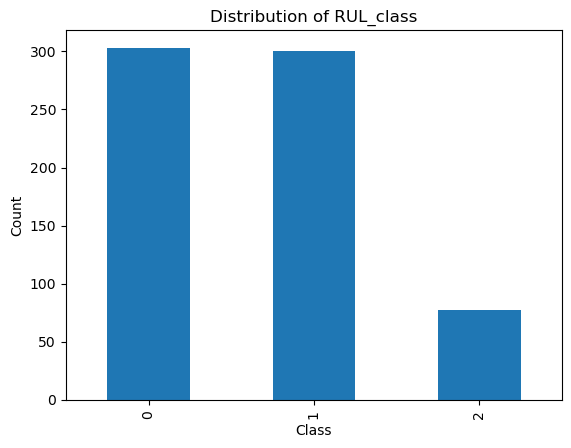

In [11]:
import pandas as pd

# Assuming df already has the 'RUL_class' column
distribution = df['RUL_class'].value_counts().sort_index()

print("Distribution of RUL_class:")
print(distribution)

# Optional: visualize with a bar plot
import matplotlib.pyplot as plt

distribution.plot(kind='bar')
plt.title('Distribution of RUL_class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


RandomforestClassifier

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:
{'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

Best cross-validation accuracy: 0.8493

Test Accuracy: 0.8897

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        57
           1       0.90      0.89      0.89        71
           2       0.62      0.62      0.62         8

    accuracy                           0.89       136
   macro avg       0.81      0.81      0.81       136
weighted avg       0.89      0.89      0.89       136

Test Accuracy: 88.97%
Confusion Matrix:
[[53  4  0]
 [ 5 63  3]
 [ 0  3  5]]


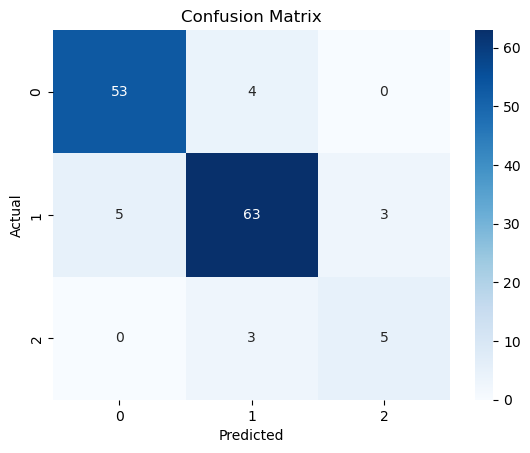

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has 'RUL_class' as the target column
X = df.drop('RUL_class', axis=1)
y = df['RUL_class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the RandomForest classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:")
print(grid_search.best_params_)
print(f"\nBest cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Test Accuracy: {accuracy * 100:.2f}%")


print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


XGBClassifier

Fitting 3 folds for each of 11664 candidates, totalling 34992 fits


C:\Users\kotha\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:05:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found:
{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.6}

Best cross-validation accuracy: 0.8713

✅ Test Accuracy: 90.44%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.93      0.89      0.91        71
           2       0.62      0.62      0.62         8

    accuracy                           0.90       136
   macro avg       0.82      0.83      0.82       136
weighted avg       0.90      0.90      0.90       136

Test Accuracy: 90.44%
Confusion Matrix:
[[55  2  0]
 [ 5 63  3]
 [ 0  3  5]]


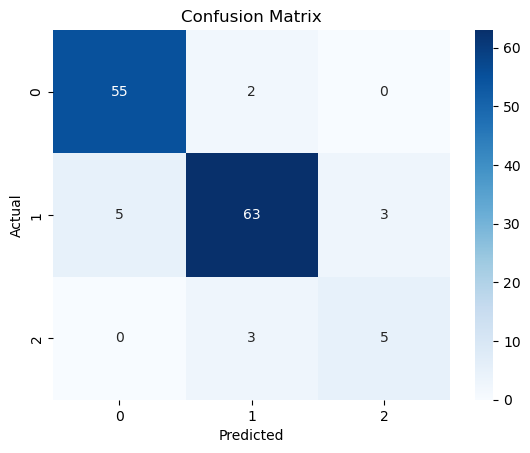

In [17]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has 'RUL_class' as the target column
X = df.drop('RUL_class', axis=1)
y = df['RUL_class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:")
print(grid_search.best_params_)
print(f"\nBest cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Test Accuracy: {accuracy * 100:.2f}%")

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


lightgbm

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1606
[LightGBM] [Info] Number of data points in the train set: 544, number of used features: 9
[LightGBM] [Info] Start training from score -0.793618
[LightGBM] [Info] Start training from score -0.865227
[LightGBM] [Info] Start training from score -2.064843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

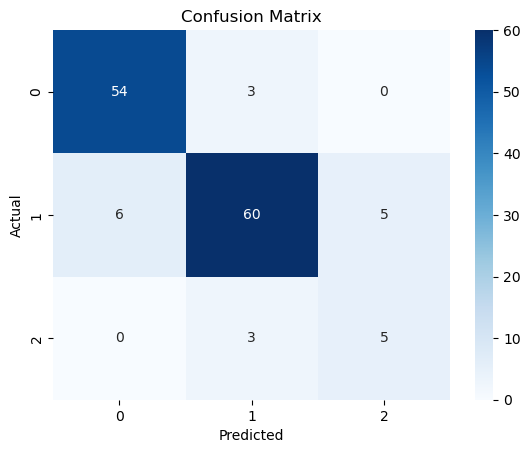

In [28]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has 'RUL_class' as the target column
X = df.drop('RUL_class', axis=1)
y = df['RUL_class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1606
[LightGBM] [Info] Number of data points in the train set: 544, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

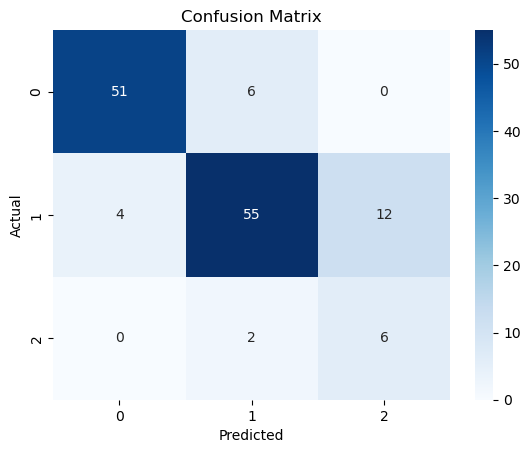

In [33]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has 'RUL_class' as the target column
X = df.drop('RUL_class', axis=1)
y = df['RUL_class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(class_weight='balanced',random_state=42)

# Define the hyperparameter grid
param_grid = {
    'num_leaves': [20, 31, 40],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:")
print(grid_search.best_params_)
print(f"\nBest cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1606
[LightGBM] [Info] Number of data points in the train set: 544, number of used features: 9
[LightGBM] [Info] Start training from score -0.793618
[LightGBM] [Info] Start training from score -0.865227
[LightGBM] [Info] Start training from score -2.064843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

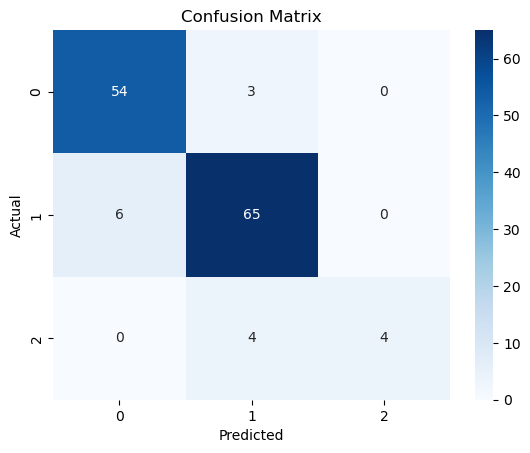


✅ Test Accuracy: 90.44%


In [34]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has 'RUL_class' as the target column
X = df.drop('RUL_class', axis=1)
y = df['RUL_class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM classifier with the given best parameters
lgb_model = lgb.LGBMClassifier(
    colsample_bytree=0.6,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=50,
    num_leaves=20,
    subsample=0.6,
    random_state=42
)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate the model

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")


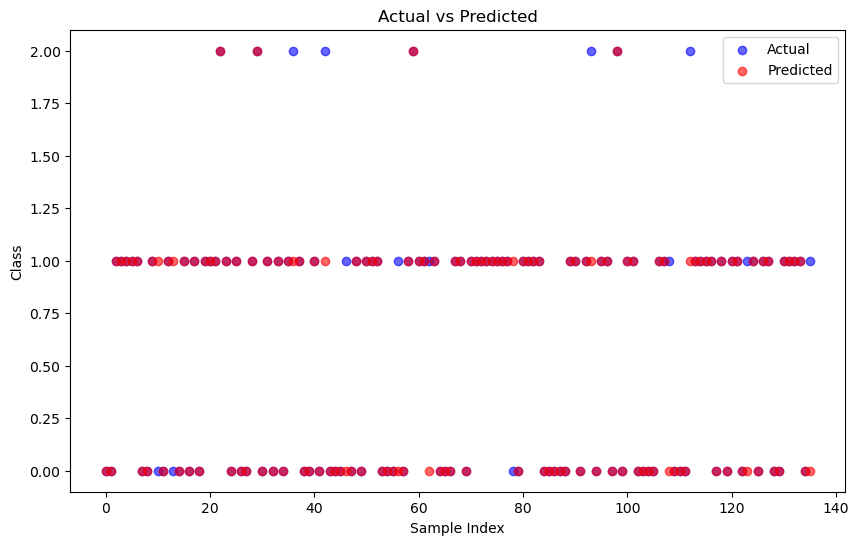

In [40]:
import matplotlib.pyplot as plt

# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()


In [45]:
import pandas as pd
from lightgbm import LGBMClassifier

# -----------------------------
# 1. Prepare features and target
# -----------------------------
# Assume your dataset is df
# Drop 'battery_id' and 'RUL' from features
feature_cols = ['cycle', 'chI', 'chV', 'chT', 'disI', 'disV', 'disT', 'BCt', 'SOH']
X = df[feature_cols]
y = df['RUL_class']
# Train the model
model = LGBMClassifier()
model.fit(X, y)

# -----------------------------
# 2. Create custom input values
# Use the same columns as in X
custom_input = pd.DataFrame({
    'cycle': [50],     # early cycle
    'chI': [0.5],      # normal charging current
    'chV': [4.2],      # healthy voltage
    'chT': [25.0],     # normal temp
    'disI': [0.4],     # normal discharge current
    'disV': [3.8],     # healthy voltage
    'disT': [26.0],    # normal temp
    'BCt': [98.0],     # high capacity
    'SOH': [0.99]      # near perfect health
})


# -----------------------------
# 3. Make prediction
# -----------------------------
pred_class = model.predict(custom_input)


print("Predicted RUL class:", pred_class)


if pred_class == 0:
    print("This battery is predicted to have a SHORTER remaining life.")
elif pred_class == 1:
    print("This battery is predicted to have a MEDIUM remaining life.")
elif pred_class == 2:
    print("This battery is predicted to have a LONGER remaining life.")
else:
    print("Prediction is invalid.")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 680, number of used features: 9
[LightGBM] [Info] Start training from score -0.808360
[LightGBM] [Info] Start training from score -0.818310
[LightGBM] [Info] Start training from score -2.178287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [ ]:
import pandas as pd

custom_input = pd.DataFrame({
    'cycle': [1000],     # very high cycle count → battery nearly worn out
    'chI': [1.5],        # high charging current → stress condition
    'chV': [3.5],        # low voltage → unhealthy
    'chT': [45.0],       # high temperature → thermal stress
    'disI': [1.2],       # high discharge current → high load
    'disV': [3.0],       # low discharge voltage → poor performance
    'disT': [50.0],      # high temperature → overheating
    'BCt': [20.0],       # very low capacity → degraded battery
    'SOH': [0.3]         # very poor health → end of life
})
# -----------------------------
pred_class = model.predict(custom_input)


print("Predicted RUL class:", pred_class)


if pred_class == 0:
    print("This battery is predicted to have a SHORTER remaining life.")
elif pred_class == 1:
    print("This battery is predicted to have a MEDIUM remaining life.")
elif pred_class == 2:
    print("This battery is predicted to have a LONGER remaining life.")
else:
    print("Prediction is invalid.")


Predicted RUL class: [0]
This battery is predicted to have a SHORTER remaining life.
